# Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix
from imblearn.over_sampling import SMOTE
%matplotlib inline      

# 1. EDA

In [277]:
df = pd.read_csv('stroke_data.csv')

In [278]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [280]:
print(f'Пропуски в df: \n{df.isna().sum()}')

print(f'\nДоля пропусков в df:\n{round(df.isna().sum() / len(df), 2)}')

Пропуски в df: 
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Доля пропусков в df:
id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  0.04
smoking_status       0.00
stroke               0.00
dtype: float64


### Наблюдение (1)

Существует 11 параметров, каждый из которых содержит 5110 значений, за исключением данных о BMI (4% отсутствующих значений).
Все параметры, вероятно, могут быть важными, за исключением "ID". Маловероятно, что он содержит какую-либо полезную информацию, поэтому его можно игнорировать в анализе.

In [281]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### Наблюдение (2)

1. Средний возраст людей составляет 43 года со стандартным отклонением 22,6 лет, что означает, что были охвачены почти все возрастные группы. Максимальный возраст составляет 82 года, минимальный — 1 месяц.

2. Средний уровень глюкозы составляет 106,1 мг/дл со стандартным отклонением 45,3 мг/дл, что в целом указывает на здоровое состояние большинства людей, но есть и те, у кого показатели глюкозы нездоровые. Максимальное значение достигает 271,7 мг/дл.

3. Средний уровень индекса массы тела составляет 28,9 кг/м², и учитывая стандартное отклонение 7,9 кг/м², можно предположить, что большинство людей имеют избыточный вес. Максимальный индекс составляет 97,6 кг/м², что указывает на очевидную ожирение.

4. Стоит отметить, что средние значения следующих параметров (гипертония, сердечные заболевания, инсульт) довольно низки, и это говорит о том, что в датасете будет мало положительных значений. Скорее всего, будет сложно что-то предсказать с такой недопредставленной информацией.

In [282]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


### Наблюдение (3)

Категориальные данные полностью заполнены. Странно, что для "Gender" есть три уникальных значения. Это следует исследовать и, при необходимости, предварительно обработать.

### CATEGORICAL VARIABLES IN MORE DETAIL

In [283]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [284]:
df[df.gender=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


### Наблюдение (4)

Так как только в одной строке пол указан как "Other", я делаю предположение в анализе, что это мог быть мужчина. В любом случае, это не сильно повлияет на конечный результат.

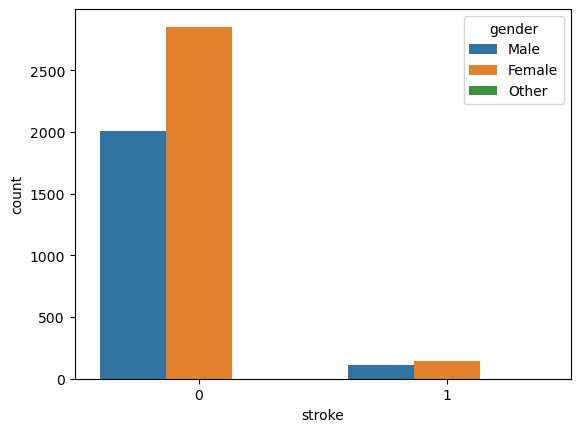

In [285]:
plt.figure()
sns.countplot(x='stroke', hue='gender', data=df)
plt.show()

### Наблюдение (5)

Как показано на диаграмме, соотношение между мужчинами и женщинами немного отличается для обоих значений "stroke". И, как упоминалось ранее, положительные значения параметра "stroke" представлены значительно меньше.

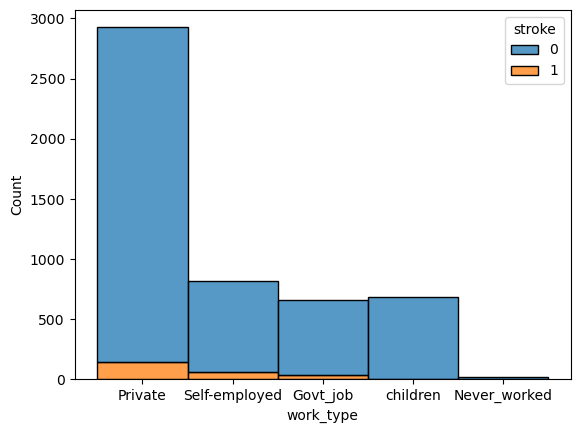

In [286]:
plt.figure
sns.histplot(x="work_type",hue="stroke",multiple="stack",data=df)
plt.show()

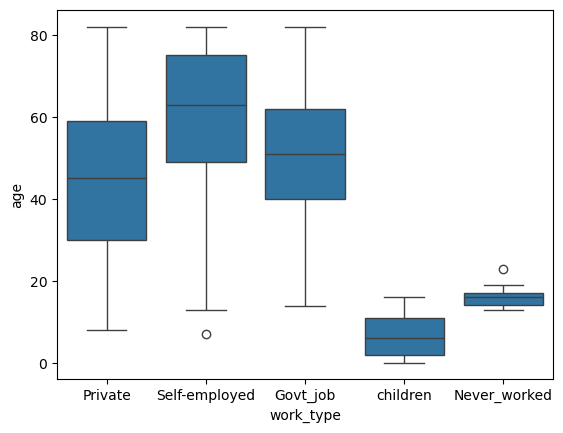

In [287]:
sns.boxplot(x='work_type',y='age', data=df)
plt.show()

### Наблюдение (6)

1. Большинство людей работают в частных компаниях. Также в этой категории наблюдается большое количество инсультов.

2. Небольшое количество безработных людей.

3. Люди старше 60 лет предпочитают работать на себя, возможно, причина в выходе на пенсию.

4. Интересно, что люди младше 40 лет не работают на государственной службе.

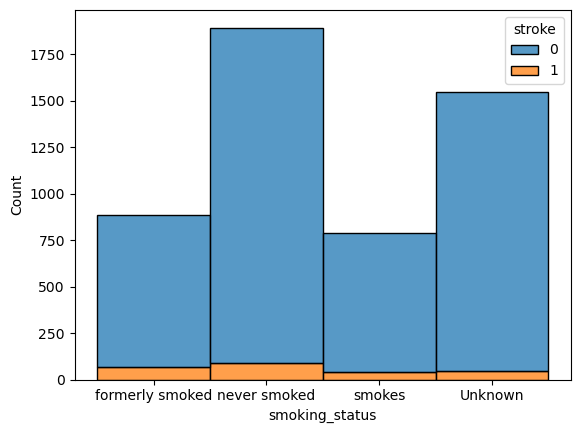

In [288]:
plt.figure
sns.histplot(x="smoking_status",hue="stroke",multiple="stack",data=df)
plt.show()

### Наблюдение (7.1)

На основе гистограммы выше, большинство людей никогда не курили, и много данных неизвестно. Последнее может усложнить анализ. Необходимо определить, возможно ли предварительно обработать данные, чтобы они были более релевантными.

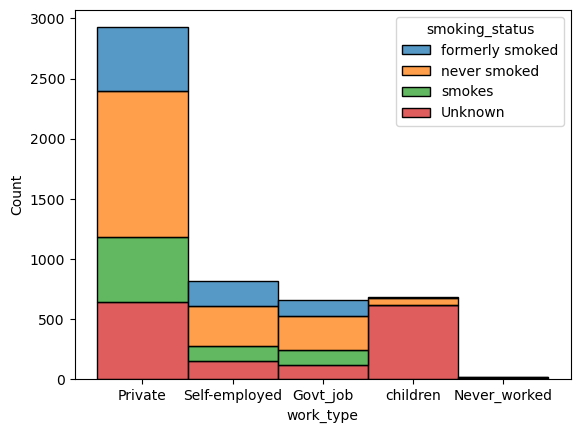

In [289]:
sns.histplot(x="work_type",hue="smoking_status",multiple="stack",data=df)
plt.show()

In [290]:
df.loc[df.work_type == "children","smoking_status"].value_counts()

smoking_status
Unknown            618
never smoked        54
formerly smoked     13
smokes               2
Name: count, dtype: int64

In [291]:
df.loc[df.age < 12,"smoking_status"].value_counts()

smoking_status
Unknown            521
never smoked        16
formerly smoked      5
smokes               1
Name: count, dtype: int64

### Наблюдение (7.2)
Как видно из гистограммы, около половины "unknown" значений приходится на категорию "children", и поэтому можно предположить, что дети должны быть в категории "never smoked".

In [292]:
df_children_never_smoked = df
df_children_never_smoked.loc[df.work_type == "children","smoking_status"] = 'never smoked'

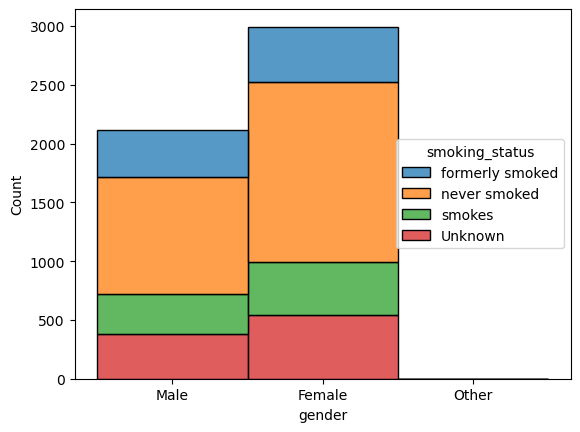

In [293]:
sns.histplot(x="gender",hue="smoking_status",multiple="stack",data=df_children_never_smoked)
plt.show()

In [294]:
df[df_children_never_smoked.gender=='Female'].smoking_status.value_counts()

smoking_status
never smoked       1528
Unknown             544
formerly smoked     471
smokes              451
Name: count, dtype: int64

### Наблюдение (7.3)
1. Если исключить детей и рассматривать только взрослых курильщиков, то по статистике соотношение мужчин к женщинам должно быть как минимум 2:1, поэтому можно предположить, что количество курильщиков-мужчин недопредставлено.
2. Так как количество некурящих женщин всегда выше, то теоретически можно определить оставшиеся "unknowns" по часто встречающемуся значению. Это всего лишь предположение.

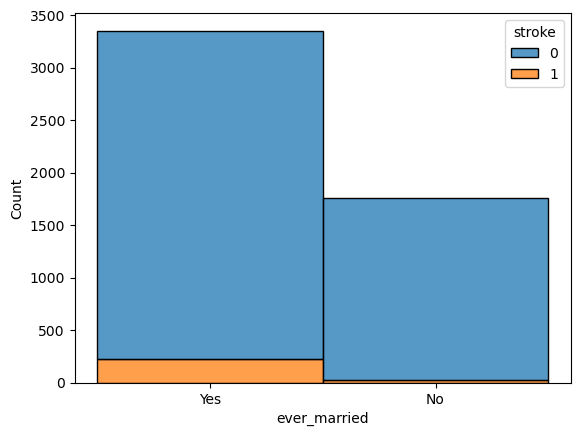

In [295]:
plt.figure
sns.histplot(x="ever_married",hue="stroke",multiple="stack",data=df)
plt.show()

### Наблюдение (8)
Диаграмма показывает неравномерное распределение "ever-married" и "never-married" людей, и можно отметить, что большое количество положительных значений "stroke" приходится на категорию "ever-married" людей.

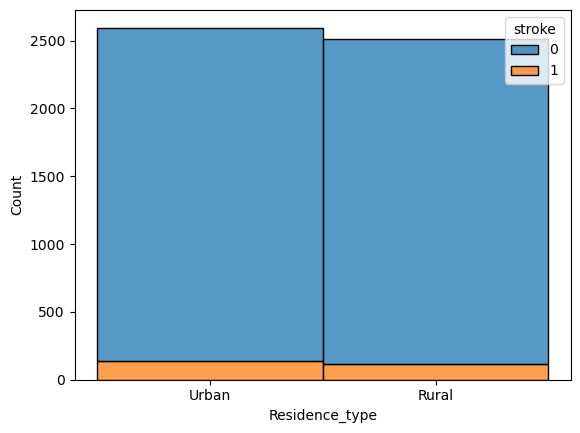

In [296]:
plt.figure
sns.histplot(x="Residence_type",hue="stroke",multiple="stack",data=df)
plt.show()

### Наблюдение (9)
Диаграмма показывает равномерное количество жителей сельской и городской местности, но, по-видимому, место жительства не особенно влияет на возникновение инсульта.

### QUANTITATIVE VARIABLES IN MORE DETAIL

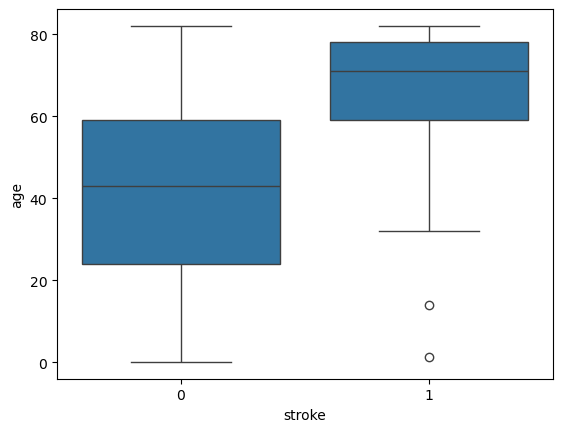

In [297]:
sns.boxplot(x='stroke',y='age', data=df)
plt.show()

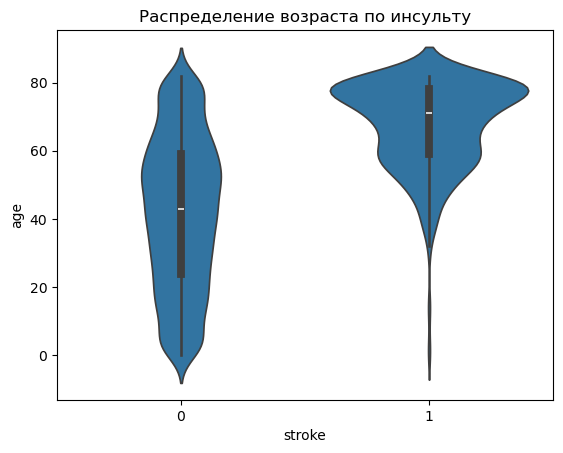

In [298]:
seaborn_plot = sns.violinplot(x='stroke',y='age', data=df)
plt.title('Распределение возраста по инсульту')
plt.show()

### Наблюдение (10)
Эти графики выше показывают, что в основном более пожилые люди подвержены заболеванию, учитывая некоторые исключения. График также подтверждает это.



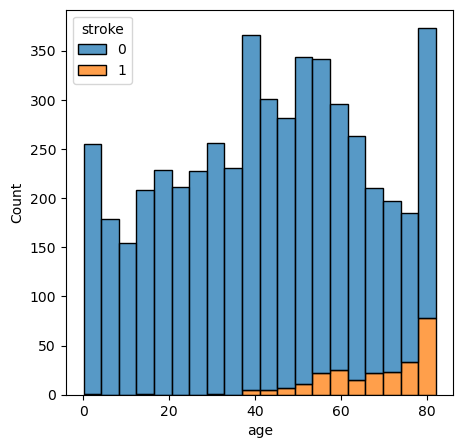

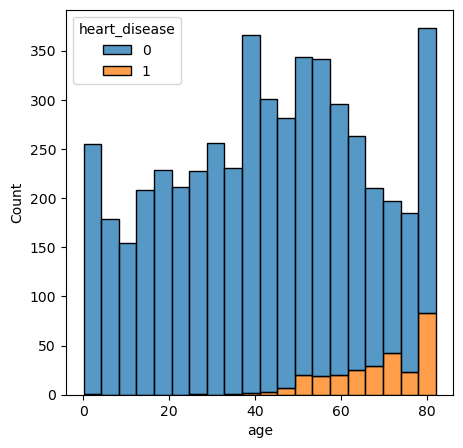

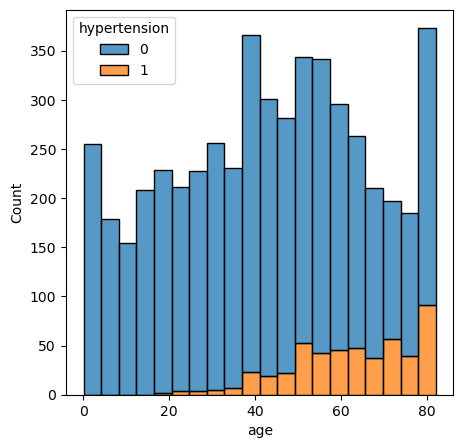

In [299]:
plt.figure(figsize=(5,5))
sns.histplot(x="age",hue="stroke",multiple="stack",data=df)
plt.show()

plt.figure(figsize=(5,5))
sns.histplot(x="age",hue="heart_disease",multiple="stack",data=df)
plt.show()

plt.figure(figsize=(5,5))
sns.histplot(x="age",hue="hypertension",multiple="stack",data=df)
plt.show()

### Наблюдение (11)
Как упоминалось ранее, пожилые люди страдают от инсульта гораздо чаще. Также стоит отметить, что распределения заболеваний почти одинаковы на всех гистограммах, поэтому необходимо выяснить, существует ли какая-либо значительная корреляция между ними.

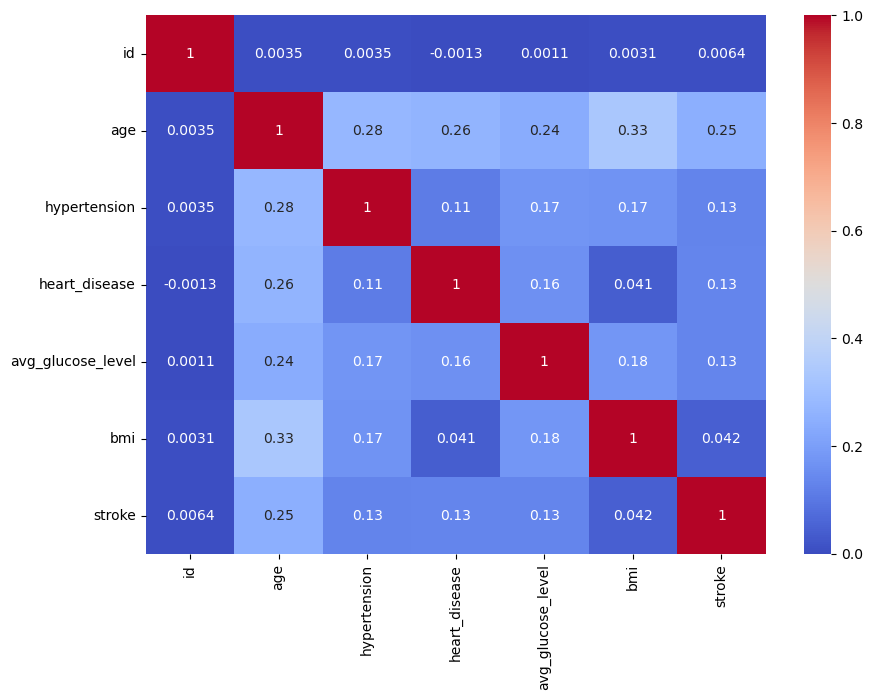

In [300]:
numeric_df = df.select_dtypes(include=[np.number])

# Вычисление корреляционной матрицы
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10,7))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Наблюдение (12)
Как оказалось, особенно сильных корреляций нигде нет. Максимальная корреляция составляет 33% (между индексом массы тела и возрастом).

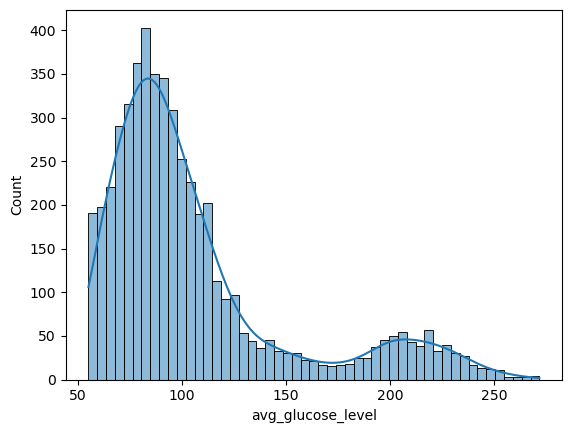

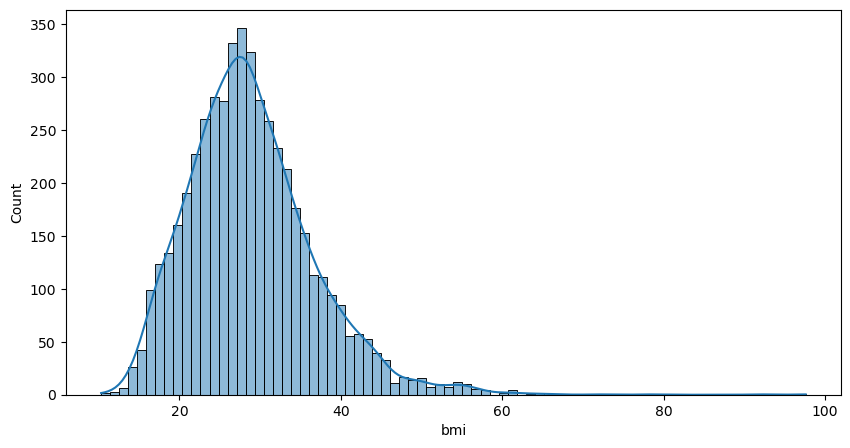

In [301]:
sns.histplot(df['avg_glucose_level'],kde=True)
plt.show()
plt.figure(figsize=(10,5))

sns.histplot(df['bmi'],kde=True)
plt.show()

### Наблюдение (13)
1. Гистограмма индекса массы тела имеет нормальное распределение, что дает нам право заменить отсутствующие значения на среднее арифметическое.
2. Гистограмма среднего уровня глюкозы имеет бимодальное распределение, что указывает на гетерогенность данных, возможно, их следует разделить на категории для более точного прогнозирования.

In [302]:
df_obesity = df[df.bmi >30]

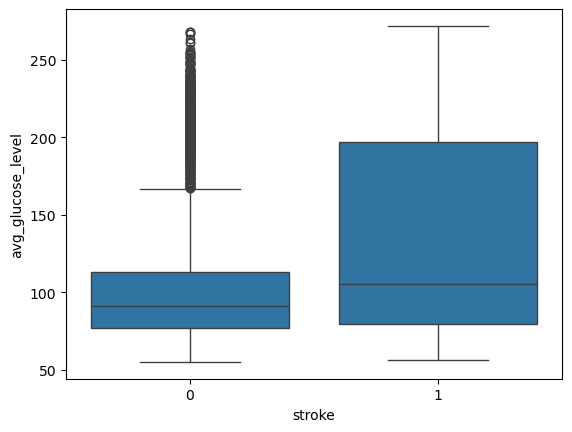

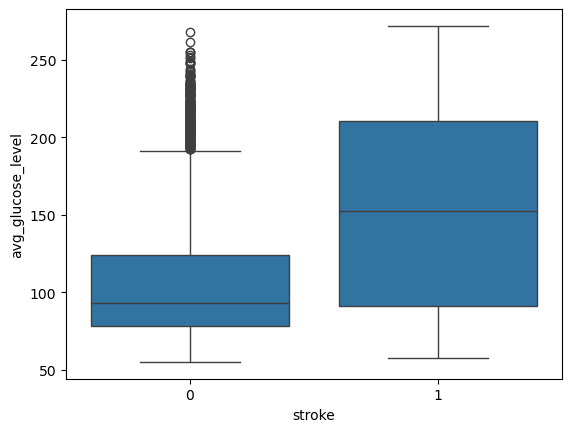

In [303]:
sns.boxplot(x='stroke',y='avg_glucose_level', data=df)
plt.show()

sns.boxplot(x='stroke',y='avg_glucose_level', data=df_obesity)
plt.show()

###  Наблюдение (14)
При фильтрации людей с избыточным весом можно заметить, что медиана среднего уровня глюкозы увеличилась (с 100 до 150 мг/дл) для людей, у которых был инсульт. Следует учитывать, что индекс массы тела также может быть категоризирован для правильного анализа.

# 2. Data cleaning and processing

In [304]:
df_clean = df.drop(["id"],axis=1) 

In [305]:
df_clean = df_clean.fillna(np.mean(df['bmi'])).round(2) 

In [306]:
df_clean.loc[df_clean.gender == 'Other', 'gender'] = 'Male' 

In [307]:
df_clean.loc[df.work_type == "children","smoking_status"] = 'never smoked'

In [308]:
df_clean.loc[(df_clean['smoking_status'] == 'Unknown') & (df_clean['gender'] == 'Male'),"smoking_status"] = 'smokes'

In [309]:
df_clean.loc[(df_clean['smoking_status'] == 'Unknown') & (df_clean['gender'] == 'Female'),"smoking_status"] = 'never smoked'

In [310]:
df_clean.smoking_status.value_counts()

smoking_status
never smoked       3069
smokes             1169
formerly smoked     872
Name: count, dtype: int64

# 3. Feature engineering

In [311]:
# Преобразование категориальных переменных в числовые значения с использованием Label Encoding
# Замена категориальных значений на числовые и преобразование типов данных в np.uint8 для экономии памяти
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_clean[column] = label_encoders[column].fit_transform(df_clean[column]).astype(np.uint8)

df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,0,1
1,0,61.0,0,0,1,3,0,202.21,28.89,1,1
2,1,80.0,0,1,1,2,0,105.92,32.50,1,1
3,0,49.0,0,0,1,2,1,171.23,34.40,2,1
4,0,79.0,1,0,1,3,0,174.12,24.00,1,1


In [312]:
def bmi_condition(x):
    if x>30:
        return 1 # Ожирение
    elif x<18.5:
        return 2 # Недостаточный вес
    elif x >=25: 
        return 3 # Избыточный вес
    else:
        return 0 # Нормальный вес


In [313]:
df_clean['bmi_norm']=df_clean['bmi'].apply(bmi_condition) 

In [314]:
def glucose_level_condition(x):
    if x<140:
        return 0 # Нормальный
    elif x>200:
        return 1 # Диабет
    else:
        return 2 # Преддиабет

In [315]:
df_clean['avg_glucose_level_norm']=df_clean['avg_glucose_level'].apply(glucose_level_condition) 

In [316]:
df_clean.drop(columns=['bmi','avg_glucose_level'],inplace=True)

In [317]:
df_clean

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,bmi_norm,avg_glucose_level_norm
0,1,67.0,0,1,1,2,1,0,1,1,1
1,0,61.0,0,0,1,3,0,1,1,3,1
2,1,80.0,0,1,1,2,0,1,1,1,0
3,0,49.0,0,0,1,2,1,2,1,1,2
4,0,79.0,1,0,1,3,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,1,0,3,0
5106,0,81.0,0,0,1,3,1,1,0,1,0
5107,0,35.0,0,0,1,3,0,1,0,1,0
5108,1,51.0,0,0,1,2,0,0,0,3,2


In [318]:
X = df_clean[['gender', 'age', 'hypertension','heart_disease', 'ever_married', 'work_type','Residence_type', 'smoking_status', 'bmi_norm','avg_glucose_level_norm']]

In [319]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [320]:
# Вычисление фактора инфляции дисперсии (VIF) для каждой переменной в DataFrame X
# VIF помогает оценить наличие мультиколлинеарности (корреляции между независимыми переменными)
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

                  feature       VIF
0                  gender  1.747709
1                     age  8.268576
2            hypertension  1.212894
3           heart_disease  1.150054
4            ever_married  5.519259
5               work_type  3.115695
6          Residence_type  1.934647
7          smoking_status  3.177334
8                bmi_norm  2.554321
9  avg_glucose_level_norm  1.238198


### Наблюдение (15)
Фактор инфляции дисперсии указывает на то, что две переменные (age и ever_married, VIF>5) потенциально имеют сильную корреляцию между собой и другими независимыми переменными. Одна из них должна быть исключена. И поскольку "age" крайне важен для дальнейшего анализа, столбец ever_married должен быть удален, чтобы избежать мультиколлинеарности.

In [321]:
df_clean.drop(columns=['ever_married'],inplace=True)

In [322]:
df_clean

,gender,age,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,bmi_norm,avg_glucose_level_norm
0,1,67.0,0,1,2,1,0,1,1,1
1,0,61.0,0,0,3,0,1,1,3,1
2,1,80.0,0,1,2,0,1,1,1,0
3,0,49.0,0,0,2,1,2,1,1,2
4,0,79.0,1,0,3,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,2,1,1,0,3,0
5106,0,81.0,0,0,3,1,1,0,1,0
5107,0,35.0,0,0,3,0,1,0,1,0
5108,1,51.0,0,0,2,0,0,0,3,2


In [323]:
X = df_clean[['gender', 'age', 'hypertension','heart_disease', 'work_type','Residence_type', 'smoking_status', 'bmi_norm','avg_glucose_level_norm']]

In [324]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [325]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                  feature       VIF
0                  gender  1.747637
1                     age  3.783216
2            hypertension  1.211718
3           heart_disease  1.139579
4               work_type  3.081465
5          Residence_type  1.933996
6          smoking_status  3.159088
7                bmi_norm  2.549126
8  avg_glucose_level_norm  1.237894


# 5. Model training and evaluation

In [326]:
df_train, df_test = train_test_split(df_clean,test_size=0.2)

In [327]:
len(df_train)

4088

In [328]:
len(df_test)

1022

In [329]:
X_train = df_train.copy()
y_train = X_train.pop("stroke")

In [330]:
X_test = df_test.copy()
y_test = X_test.pop("stroke")

In [331]:
X_train.shape

(4088, 9)

In [332]:
X_test.shape

(1022, 9)

In [333]:
y_train.value_counts()

stroke
0    3890
1     198
Name: count, dtype: int64

In [334]:
y_test.value_counts()

stroke
0    971
1     51
Name: count, dtype: int64

In [ ]:
# Создание списка классификаторов
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True)),  
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier(max_iter=1000)),
    ('XGBoost', XGBClassifier())
]

# Создание пустого DataFrame для хранения результатов
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'MCC', 'TP', 'TN', 'FP', 'FN'])

# Обучение и оценка каждого классификатора
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    # Расчет метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Получение значений из матрицы ошибок
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Расчет коэффициента корреляции Мэтьюса
    mcc = matthews_corrcoef(y_test, y_pred)

    # Расчет ROC AUC только если доступен predict_proba
    if hasattr(clf, "predict_proba"):
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None
    
    # Добавление результатов в DataFrame
    results_df.loc[len(results_df)] = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'MCC': mcc,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
    }

results_df


c:\Users\Oleg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Oleg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Oleg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.950098,0.000000,0.000000,0.000000,0.839876,0.000000,0,971,0,51
1,Decision Tree,0.905088,0.074074,0.078431,0.076190,0.538125,0.026220,4,921,50,47
2,Random Forest,0.926614,0.000000,0.000000,0.000000,0.726207,-0.035540,0,947,24,51
3,Support Vector Machine,0.950098,0.000000,0.000000,0.000000,0.421104,0.000000,0,971,0,51
4,K-Nearest Neighbors,0.945205,0.142857,0.019608,0.034483,0.649320,0.035452,1,965,6,50
5,Naive Bayes,0.876712,0.142857,0.294118,0.192308,0.811827,0.144457,15,881,90,36
6,Neural Network,0.950098,0.000000,0.000000,0.000000,0.821924,0.000000,0,971,0,51
7,XGBoost,0.932485,0.000000,0.000000,0.000000,0.769815,-0.030686,0,953,18,51


In [ ]:
# Создание списка классификаторов с сетками гиперпараметров
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}),
    ('Support Vector Machine', SVC(probability=True), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('Neural Network', MLPClassifier(max_iter=1000), {'hidden_layer_sizes': [(50,), (100,), (50, 50)]}),
    ('XGBoost', XGBClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]})
]

# Создание пустого DataFrame для хранения результатов
results_df_params = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'MCC', 'TP', 'TN', 'FP', 'FN'])

# Обучение и оценка каждого классификатора с использованием GridSearchCV
for name, clf, param_grid in classifiers:
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    clf = grid_search.best_estimator_
    
    y_pred = clf.predict(X_test)
    
    # Расчет метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Получение значений из матрицы ошибок
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Расчет ROC AUC только если доступен predict_proba
    if hasattr(clf, "predict_proba"):
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None
    
    # Добавление результатов в DataFrame с использованием loc
    results_df_params.loc[len(results_df_params)] = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'MCC': mcc,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
    }

# Отображение DataFrame с результатами
results_df_params


c:\Users\Oleg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Oleg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Oleg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.950098,0.000000,0.000000,0.000000,0.831698,0.000000,0,971,0,51
1,Decision Tree,0.924658,0.093750,0.058824,0.072289,0.610650,0.036204,3,942,29,48
2,Random Forest,0.945205,0.000000,0.000000,0.000000,0.786596,-0.016069,0,966,5,51
3,Support Vector Machine,0.950098,0.000000,0.000000,0.000000,0.426839,0.000000,0,971,0,51
4,K-Nearest Neighbors,0.949119,0.333333,0.019608,0.037037,0.693938,0.070628,1,969,2,50
5,Naive Bayes,0.876712,0.142857,0.294118,0.192308,0.811827,0.144457,15,881,90,36
6,Neural Network,0.950098,0.000000,0.000000,0.000000,0.824983,0.000000,0,971,0,51
7,XGBoost,0.945205,0.000000,0.000000,0.000000,0.830961,-0.016069,0,966,5,51


### NB
Данные не сбалансированы, поэтому необходимо искусственно увеличить данные для категории "stroke". И поскольку, согласно статистике, соотношение людей с инсультом и здоровых людей составляет 1 к 4, мы применим "SMOTE" к нашим данным.

In [338]:
sm = SMOTE(sampling_strategy=0.25)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

C:\Users\Oleg\AppData\Local\Temp\ipykernel_11144\2187272644.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())


In [339]:
X_train_smote.shape

(4862, 9)

In [340]:
y_train_smote.shape

(4862,)

In [ ]:
# Создание списка классификаторов
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True)),  
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier(max_iter=1000)),
    ('XGBoost', XGBClassifier())
]

# Создание пустого DataFrame для хранения результатов
results_df_smote = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'MCC', 'TP', 'TN', 'FP', 'FN'])

# Обучение и оценка каждого классификатора
for name, clf in classifiers:
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)
    
    # Расчет метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Получение значений из матрицы ошибок
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Расчет коэффициента корреляции Мэтьюса
    mcc = matthews_corrcoef(y_test, y_pred)

    # Расчет ROC AUC только если доступен predict_proba
    if hasattr(clf, "predict_proba"):
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None
    
    # Добавление результатов в DataFrame с использованием loc
    results_df_smote.loc[len(results_df_smote)] = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'MCC': mcc,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
    }

results_df_smote


c:\Users\Oleg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.905088,0.197368,0.294118,0.236220,0.815664,0.191960,15,910,61,36
1,Decision Tree,0.892368,0.135802,0.215686,0.166667,0.587357,0.115744,11,901,70,40
2,Random Forest,0.909002,0.080000,0.078431,0.079208,0.766503,0.031350,4,925,46,47
3,Support Vector Machine,0.950098,0.000000,0.000000,0.000000,0.762878,0.000000,0,971,0,51
4,K-Nearest Neighbors,0.892368,0.135802,0.215686,0.166667,0.663193,0.115744,11,901,70,40
5,Naive Bayes,0.846380,0.131944,0.372549,0.194872,0.811100,0.152591,19,846,125,32
6,Neural Network,0.900196,0.200000,0.333333,0.250000,0.796713,0.207621,17,903,68,34
7,XGBoost,0.898239,0.115942,0.156863,0.133333,0.767654,0.081609,8,910,61,43


In [ ]:
# Создание списка классификаторов с сетками гиперпараметров
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}),
    ('Support Vector Machine', SVC(probability=True), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('Neural Network', MLPClassifier(max_iter=1000), {'hidden_layer_sizes': [(50,), (100,), (50, 50)]}),
    ('XGBoost', XGBClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]})
]

# Создание пустого DataFrame для хранения результатов
results_df_smote_params = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'MCC', 'TP', 'TN', 'FP', 'FN'])

# Обучение и оценка каждого классификатора с использованием GridSearchCV и SMOTE
for name, clf, param_grid in classifiers:
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_smote, y_train_smote)
    clf = grid_search.best_estimator_
    
    y_pred = clf.predict(X_test)
    
    # Расчет метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Расчет ROC AUC только если доступен predict_proba
    if hasattr(clf, "predict_proba"):
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None
    
    # Добавление результатов в DataFrame с использованием loc
    results_df_smote_params.loc[len(results_df_smote_params)] = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'MCC': mcc,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
    }

results_df_smote_params

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.905088,0.197368,0.294118,0.236220,0.815664,0.191960,15,910,61,36
1,Decision Tree,0.897260,0.125000,0.176471,0.146341,0.561964,0.094949,9,908,63,42
2,Random Forest,0.906067,0.090909,0.098039,0.094340,0.767058,0.044914,5,921,50,46
3,Support Vector Machine,0.909002,0.208333,0.294118,0.243902,0.723622,0.200309,15,914,57,36
4,K-Nearest Neighbors,0.893346,0.118421,0.176471,0.141732,0.657216,0.089192,9,904,67,42
5,Naive Bayes,0.846380,0.131944,0.372549,0.194872,0.811100,0.152591,19,846,125,32
6,Neural Network,0.892368,0.182796,0.333333,0.236111,0.800024,0.193105,17,895,76,34
7,XGBoost,0.897260,0.064516,0.078431,0.070796,0.728782,0.017056,4,913,58,47


# 6. Results interpretation

In [342]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.950098,0.000000,0.000000,0.000000,0.839876,0.000000,0,971,0,51
1,Decision Tree,0.905088,0.074074,0.078431,0.076190,0.538125,0.026220,4,921,50,47
2,Random Forest,0.926614,0.000000,0.000000,0.000000,0.726207,-0.035540,0,947,24,51
3,Support Vector Machine,0.950098,0.000000,0.000000,0.000000,0.421104,0.000000,0,971,0,51
4,K-Nearest Neighbors,0.945205,0.142857,0.019608,0.034483,0.649320,0.035452,1,965,6,50
5,Naive Bayes,0.876712,0.142857,0.294118,0.192308,0.811827,0.144457,15,881,90,36
6,Neural Network,0.950098,0.000000,0.000000,0.000000,0.821924,0.000000,0,971,0,51
7,XGBoost,0.932485,0.000000,0.000000,0.000000,0.769815,-0.030686,0,953,18,51


### Оценка базового прогнозирования
Если исходить из того, что модель в целом должна хорошо определять как здоровых людей, так и людей с инсультом, то Naive Bayes выделяется среди других. У него лучший коэффициент MCC и F1 Score, хотя и низкая точность.

In [344]:
results_df_params

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.950098,0.000000,0.000000,0.000000,0.831698,0.000000,0,971,0,51
1,Decision Tree,0.924658,0.093750,0.058824,0.072289,0.610650,0.036204,3,942,29,48
2,Random Forest,0.945205,0.000000,0.000000,0.000000,0.786596,-0.016069,0,966,5,51
3,Support Vector Machine,0.950098,0.000000,0.000000,0.000000,0.426839,0.000000,0,971,0,51
4,K-Nearest Neighbors,0.949119,0.333333,0.019608,0.037037,0.693938,0.070628,1,969,2,50
5,Naive Bayes,0.876712,0.142857,0.294118,0.192308,0.811827,0.144457,15,881,90,36
6,Neural Network,0.950098,0.000000,0.000000,0.000000,0.824983,0.000000,0,971,0,51
7,XGBoost,0.945205,0.000000,0.000000,0.000000,0.830961,-0.016069,0,966,5,51


### Оценка базового прогнозирования с вариацией гиперпараметров
Гиперпараметры улучшили некоторые метрики моделей, но Naive Bayes по-прежнему кажется наиболее приемлемым.

In [ ]:
results_df_smote

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.905088,0.197368,0.294118,0.236220,0.815664,0.191960,15,910,61,36
1,Decision Tree,0.892368,0.135802,0.215686,0.166667,0.587357,0.115744,11,901,70,40
2,Random Forest,0.909002,0.080000,0.078431,0.079208,0.766503,0.031350,4,925,46,47
3,Support Vector Machine,0.950098,0.000000,0.000000,0.000000,0.762878,0.000000,0,971,0,51
4,K-Nearest Neighbors,0.892368,0.135802,0.215686,0.166667,0.663193,0.115744,11,901,70,40
5,Naive Bayes,0.846380,0.131944,0.372549,0.194872,0.811100,0.152591,19,846,125,32
6,Neural Network,0.900196,0.200000,0.333333,0.250000,0.796713,0.207621,17,903,68,34
7,XGBoost,0.898239,0.115942,0.156863,0.133333,0.767654,0.081609,8,910,61,43


In [349]:
results_df_smote_params

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.905088,0.197368,0.294118,0.236220,0.815664,0.191960,15,910,61,36
1,Decision Tree,0.897260,0.125000,0.176471,0.146341,0.561964,0.094949,9,908,63,42
2,Random Forest,0.906067,0.090909,0.098039,0.094340,0.767058,0.044914,5,921,50,46
3,Support Vector Machine,0.909002,0.208333,0.294118,0.243902,0.723622,0.200309,15,914,57,36
4,K-Nearest Neighbors,0.893346,0.118421,0.176471,0.141732,0.657216,0.089192,9,904,67,42
5,Naive Bayes,0.846380,0.131944,0.372549,0.194872,0.811100,0.152591,19,846,125,32
6,Neural Network,0.892368,0.182796,0.333333,0.236111,0.800024,0.193105,17,895,76,34
7,XGBoost,0.897260,0.064516,0.078431,0.070796,0.728782,0.017056,4,913,58,47


### Оценка прогнозирования с использованием SMOTE
С добавлением искусственных данных можно сказать, что Naive Bayes уже не выглядит таким высокоприоритетным. Другие модели также демонстрируют относительно хорошую способность к прогнозированию. Их метрики меняются время от времени в зависимости от количества тестовых данных, поэтому нельзя с уверенностью сказать, какая модель лучше. Но определенно SMOTE помогает достичь лучших результатов.



### Заключение:
1. В этом проекте были изучены различные атрибуты, способствующие инсульту, и интересно, что ни один из них не имеет сильной корреляции с риском развития инсульта. Основное понимание данных заключается в том, что пожилые пациенты с большей вероятностью перенесут инсульт, чем молодые. Кроме того, люди имеют одинаковую вероятность перенести инсульт, независимо от пола пациента, его места жительства или его семейного положения.

2. Для моделирования наиболее эффективной в прогнозировании была Naive Bayes, но с невысокой точностью. Предоставленные данные были несбалансированными, поэтому модели показали плохую производительность. SMOTE помог превзойти базовую модель, поэтому можно упомянуть, что более равномерно распределенные данные помогут улучшить метрики моделей в дальнейшем анализе инсультов.